# Data assimilation
### With a simpler $2\times 2$ dyadic field

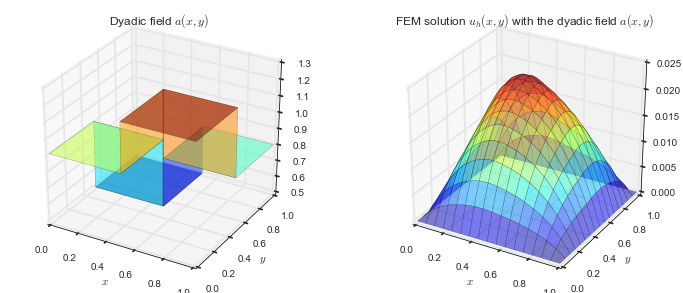

In [1]:
import numpy as np
import importlib
import dyadic_fem as df
import seaborn as sns
import matplotlib.pyplot as plt
import pdb
importlib.reload(df)
%matplotlib inline

# Here we go
fem_div = 8

a = df.make_dyadic_random_field(div=1, a_bar=1.0, c=0.5, seed=1)
fem = df.DyadicFEMSolver(div=fem_div, rand_field=a, f=1.0)
fem.solve()

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
a.plot(ax, title='Dyadic field $a(x,y)$')
ax = fig.add_subplot(1, 2, 2, projection='3d')
fem.u.plot(ax, title='FEM solution $u_h(x,y)$ with the dyadic field $a(x,y)$')
plt.show()

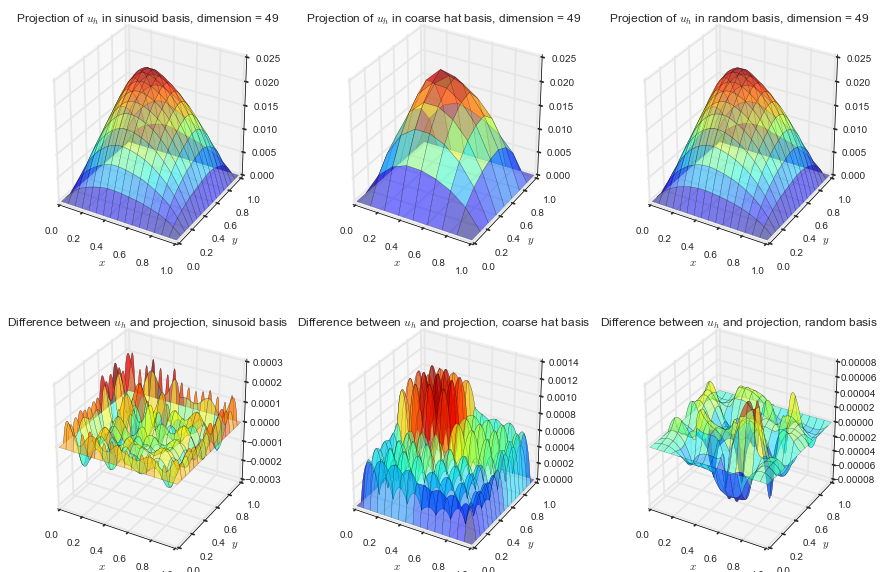

In [2]:
coarse_div = 3
n = (2**coarse_div - 1) * (2**coarse_div - 1)

sin_b = df.make_sine_basis(fem_div, N=2**coarse_div-1, M=2**coarse_div-1, space='H1')
hat_b = df.make_hat_basis(div=coarse_div, space='H1')
np.random.seed(6)
rad_b, rad_fields = df.make_random_basis(n=n, field_div=2, fem_div=fem_div, space='H1')

u_p_sin = sin_b.project(fem.u)
u_p_hat = hat_b.project(fem.u)
u_p_rad = rad_b.project(fem.u)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(2, 3, 1, projection='3d')
u_p_sin.plot(ax, title='Projection of $u_h$ in sinusoid basis, dimension = {0}'.format(sin_b.n))
ax = fig.add_subplot(2, 3, 2, projection='3d')
u_p_hat.plot(ax, title='Projection of $u_h$ in coarse hat basis, dimension = {0}'.format(hat_b.n))
ax = fig.add_subplot(2, 3, 3, projection='3d')
u_p_rad.plot(ax, title='Projection of $u_h$ in random basis, dimension = {0}'.format(rad_b.n))
ax = fig.add_subplot(2, 3, 4, projection='3d')
(fem.u - u_p_sin).plot(ax, title='Difference between $u_h$ and projection, sinusoid basis')
ax = fig.add_subplot(2, 3, 5, projection='3d')
(fem.u - u_p_hat).plot(ax, title='Difference between $u_h$ and projection, coarse hat basis')
ax = fig.add_subplot(2, 3, 6, projection='3d')
(fem.u - u_p_rad).plot(ax, title='Difference between $u_h$ and projection, random basis')

plt.show()

Done hat and sinusoid basis


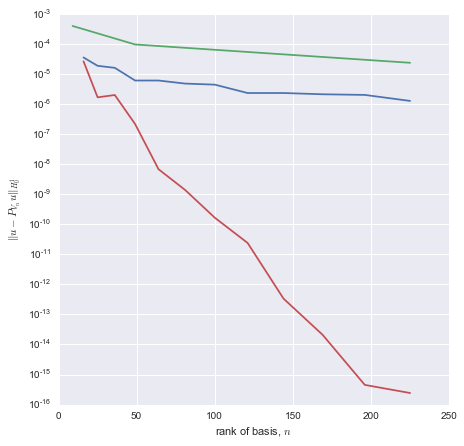

In [33]:
import time
div_levels = range(2,5)
ns = np.zeros(len(div_levels))
sin_err = []
sin_ns = []
hat_err = []
hat_ns = []
rad_err = []
rad_ns = []

for i in range(4,16):
    sin_b = df.make_sine_basis(fem_div, N=i, M=i, space='H1')
    u_p_sin = sin_b.project(fem.u)
    sin_ns.append(sin_b.n)
    sin_err.append((u_p_sin - fem.u).norm(space='H1'))
    
    rad_b, rad_fields = df.make_random_basis(n=i*i, field_div=2, fem_div=fem_div, space='H1')
    u_p_rad = rad_b.project(fem.u)
    rad_ns.append(rad_b.n)
    rad_err.append((u_p_rad - fem.u).norm(space='H1'))q

print('Done hat and sinusoid basis')
    
for i, coarse_div in enumerate(div_levels):
    hat_b = df.make_hat_basis(div=coarse_div, space='H1')
    u_p_hat = hat_b.project(fem.u)
    hat_ns.append(hat_b.n)
    hat_err.append((u_p_hat - fem.u).norm(space='H1'))
    
f, ax = plt.subplots(figsize=(7, 7))
ax.set(yscale="log")
plt.plot(sin_ns, sin_err, label='sinusoid basis')
plt.plot(hat_ns, hat_err, label='coarse grid hat fn\'s')
plt.plot(rad_ns, rad_err, label='random field basis')
ax.set(xlabel='rank of basis, $n$', ylabel='$\|u - P_{V_n} u\|_{H_0^1}$')
plt.show()

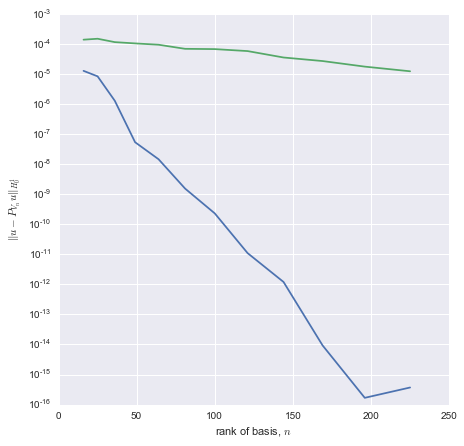

In [34]:
import time
div_levels = range(2,5)
ns = np.zeros(len(div_levels))

rad_err = []
rad_ns = []
mis_err = []
mis_ns = []

for i in range(4,16):

    rad_b, rad_fields = df.make_random_basis(n=i*i, field_div=2, fem_div=fem_div, space='H1')
    u_p_rad = rad_b.project(fem.u)
    rad_ns.append(rad_b.n)
    rad_err.append((u_p_rad - fem.u).norm(space='H1'))

    mis_b, mis_fields = df.make_random_basis(n=i*i, field_div=4, fem_div=fem_div, space='H1')
    u_p_mis = mis_b.project(fem.u)
    mis_ns.append(mis_b.n)
    mis_err.append((u_p_mis - fem.u).norm(space='H1'))
    
f, ax = plt.subplots(figsize=(7, 7))
ax.set(yscale="log")
plt.plot(rad_ns, rad_err, label='random field basis')
plt.plot(mis_ns, mis_err, label='random field basis, mismatched dyadic division')
ax.set(xlabel='rank of basis, $n$', ylabel='$\|u - P_{V_n} u\|_{H_0^1}$')
plt.show()